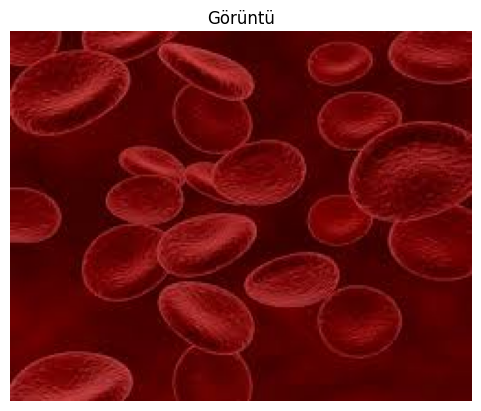

In [22]:
import cv2
from matplotlib import pyplot as plt

# Görüntüyü yükle
image_path = "al.jpg"
image = cv2.imread(image_path)

# Görüntüyü göster
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Görüntü')
plt.axis('off')
plt.show()

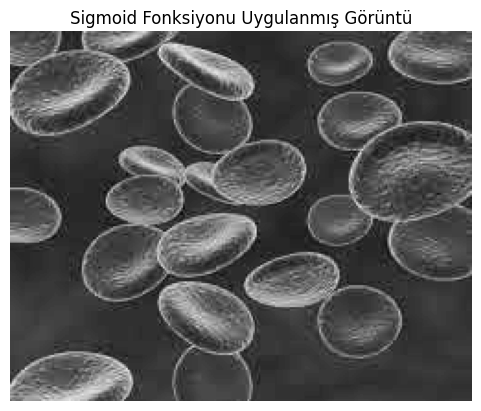

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_path = "al.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

normalized_image = image.astype(float) / 255.0

# Sigmoid fonksiyonu
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


sigmoid_image = sigmoid(normalized_image)

plt.imshow(sigmoid_image, cmap='gray')
plt.title('Sigmoid Fonksiyonu Uygulanmış Görüntü')
plt.axis('off')
plt.show()

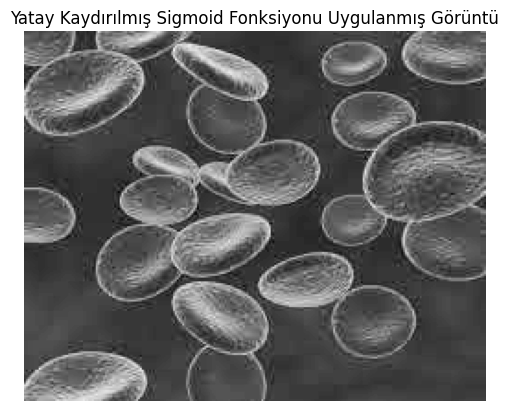

In [50]:

def sigmoid(x, shift):
    return 1 / (1 + np.exp(-(x + shift)))

# 30 pixel sağa kaydırır
shift_amount =30

sigmoid_image = sigmoid(normalized_image, shift_amount)

plt.imshow(sigmoid_image, cmap='gray')
plt.title('Yatay Kaydırılmış Sigmoid Fonksiyonu Uygulanmış Görüntü')
plt.axis('off')
plt.show()

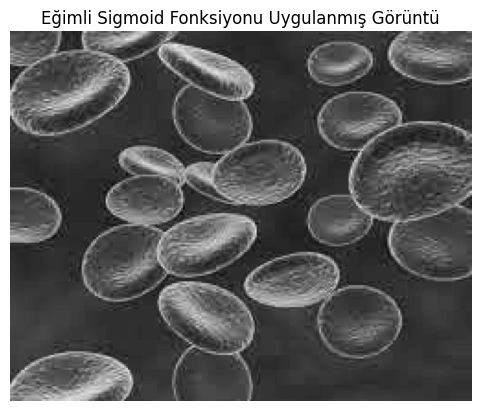

In [48]:

def sigmoid(x, alpha):
    return 1 / (1 + np.exp(-alpha * x))

# Eğim faktörü
alpha = 0.1

sigmoid_image = sigmoid(normalized_image, alpha)

plt.imshow(sigmoid_image, cmap='gray')
plt.title('Eğimli Sigmoid Fonksiyonu Uygulanmış Görüntü')
plt.axis('off')
plt.show()

In [155]:
import cv2
import numpy as np
img=cv2.imread("cizgi.jpg")

gri=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kenar=cv2.Canny(gri,100,250)
cizgi=cv2.HoughLinesP(kenar,1,np.pi/180,10)
print(cizgi)

for i in cizgi:
    x1,y1,x2,y2=i[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),7)

img_concat = np.hstack((cv2.imread("cizgi.jpg"), img))


cv2.imshow("İlk Hal ve Son Hal", img_concat)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 34 259 272 259]]

 [[201  57 206  52]]

 [[363  58 456 164]]

 ...

 [[317 272 317 272]]

 [[272 274 272 269]]

 [[308 272 308 272]]]


In [172]:
import cv2
import numpy as np

img = cv2.imread("goz.jpg")


if img is None:
    print("Görüntü yüklenemedi.")
else:
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #  (Hough Circles) 
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=200, param2=30, minRadius=30, maxRadius=50)

    # Çemberleri işaretleme
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            # Çemberi çizme
            cv2.circle(img, center, radius, (0, 255, 0), 3)

        cv2.imshow("Gözler Tespit Edildi", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Göz bulunamadı.")

In [169]:
import cv2
import numpy as np
import pandas as pd

image = cv2.imread("say.jpg")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 70, 70])
upper_green = np.array([80, 200, 200])

# Maskeleme ile koyu yeşil pikselleri tespit et
mask = cv2.inRange(hsv, lower_green, upper_green)


In [179]:
# Koyu yeşil pikselleri görüntüyle birleştir
result = cv2.bitwise_and(image, image, mask=mask)

# Orijinal görüntü ve maske sonucunu yatay olarak birleştir
output_image = np.hstack((image, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), result))


# Koyu yeşil bölgeleri bul
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Kontur bölgeler için kenarı çiz
cv2.drawContours(image, contours, -1, (255, 255, 0), 0.5)

data = []


for i, contour in enumerate(contours):
    # Konturun alanını hesapla
    area = cv2.contourArea(contour)
    
    if area > 100:
        # Konturun sınırladığı bölgeyi tut
        x, y, w, h = cv2.boundingRect(contour)
        
        # Sınırlayıcı kutunun özelliklerini hesaplama işlemleri
        center = (int(x + w/2), int(y + h/2))
        length = w
        width = h
        diagonal = np.sqrt(w**2 + h**2)
        energy = cv2.contourArea(contour)**2 / (w * h)
        entropy = -1 * np.sum((contour/255) * np.log2(contour/255))
        mean_val = np.mean(image[y:y+h, x:x+w])
        median_val = np.median(image[y:y+h, x:x+w])
        
        
        data.append([i+1, center, length, width, diagonal, energy, entropy, mean_val, median_val])


df = pd.DataFrame(data, columns=["No", "Center", "Length", "Width", "Diagonal", "Energy", "Entropy", "Mean", "Median"])

# DataFrame'i Excel dosyasına aktarma
df.to_excel("koyu_yesil_bolgeler.xlsx", index=False)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Argument 'thickness' is required to be an integer
>  - Argument 'thickness' is required to be an integer


In [180]:
cv2.imshow("Koyu Yesil Alanlari Cizme", image)
cv2.waitKey(0)  # Bir tuşa basılana kadar bekleyin
cv2.destroyAllWindows() 